In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from datetime import date


In [2]:
inflows = pd.read_parquet("../data/ucsd-inflows.pqt")
outflows = pd.read_parquet("../data/ucsd-outflows.pqt")

In [3]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [4]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [5]:
print("\nSummary statistics of inflows:")
print(inflows.describe())
print("\nSummary statistics of outflows:")
print(outflows.describe())


Summary statistics of inflows:
       prism_consumer_id        amount
count      513115.000000  5.131150e+05
mean         2940.304228  7.346998e+02
std          1753.067672  5.296566e+03
min             0.000000  1.000000e-02
25%          1356.000000  2.058000e+01
50%          2971.000000  1.000000e+02
75%          4458.000000  5.000000e+02
max          5941.000000  1.154966e+06

Summary statistics of outflows:
       prism_consumer_id        amount
count       2.597488e+06  2.597488e+06
mean        3.084229e+03  1.451264e+02
std         1.820571e+03  1.697875e+03
min         0.000000e+00  0.000000e+00
25%         1.369000e+03  9.630000e+00
50%         3.245000e+03  2.426000e+01
75%         4.733000e+03  6.636000e+01
max         5.943000e+03  6.548532e+05


In [6]:
print("\nInflows info:")
print(inflows.info())
print("\nOutflows info:")
print(outflows.info())


Inflows info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513115 entries, 0 to 513114
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   prism_consumer_id  513115 non-null  int64  
 1   prism_account_id   513115 non-null  object 
 2   memo               513115 non-null  object 
 3   amount             513115 non-null  float64
 4   posted_date        513115 non-null  object 
 5   category           513115 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.5+ MB
None

Outflows info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597488 entries, 0 to 2597487
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   prism_consumer_id  int64  
 1   prism_account_id   object 
 2   memo               object 
 3   amount             float64
 4   posted_date        object 
 5   category           object 
dtypes: float64(1), int64(1), o

### Inflows/Outflows:
- **prism_consumer_id** (quantitative): unique identifier for each consumer (user)
- **prism_account_id** (qualitative): identifier for each account
- **memo** (qualitative): descriptions or labels of transactions
- **amount** (quantitative): value of the transaction
- **posted_date** (qualitative): date when the transaction was posted
- **category** (qualitative): transaction type

In [7]:
# check for missing values (there are no missing values)
print("\nMissing values in inflows:")
print(inflows.isnull().sum())
print("\nMissing values in outflows:")
print(outflows.isnull().sum())


Missing values in inflows:
prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64

Missing values in outflows:
prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64


In [8]:
# get unique values for 'category' column in inflows
inflows_categories = inflows['category'].unique()
print("Unique categories in inflows:", inflows_categories)

# get unique values for 'category' column in outflows
outflows_categories = outflows['category'].unique()
print("\nUnique categories in outflows:", outflows_categories)

Unique categories in inflows: ['PAYCHECK' 'EXTERNAL_TRANSFER' 'MISCELLANEOUS' 'INVESTMENT_INCOME' 'TAX'
 'DEPOSIT' 'SELF_TRANSFER' 'REFUND' 'PAYCHECK_PLACEHOLDER' 'INSURANCE'
 'OTHER_BENEFITS' 'UNEMPLOYMENT_BENEFITS' 'LOAN' 'SMALL_DOLLAR_ADVANCE']

Unique categories in outflows: ['LOAN' 'ATM_CASH' 'FOOD_AND_BEVERAGES' 'ENTERTAINMENT'
 'GENERAL_MERCHANDISE' 'ESSENTIAL_SERVICES' 'GROCERIES'
 'EXTERNAL_TRANSFER' 'AUTOMOTIVE' 'UNCATEGORIZED' 'CREDIT_CARD_PAYMENT'
 'SELF_TRANSFER' 'PETS' 'HEALTHCARE_MEDICAL' 'INSURANCE' 'ACCOUNT_FEES'
 'HOME_IMPROVEMENT' 'TRAVEL' 'MORTGAGE' 'OVERDRAFT' 'EDUCATION' 'RENT'
 'TAX' 'CHILD_DEPENDENTS' 'GIFTS_DONATIONS' 'BILLS_UTILITIES' 'PAYCHECK'
 'BNPL' 'AUTO_LOAN']


The output above show all the unique categories from inflows and outflows.

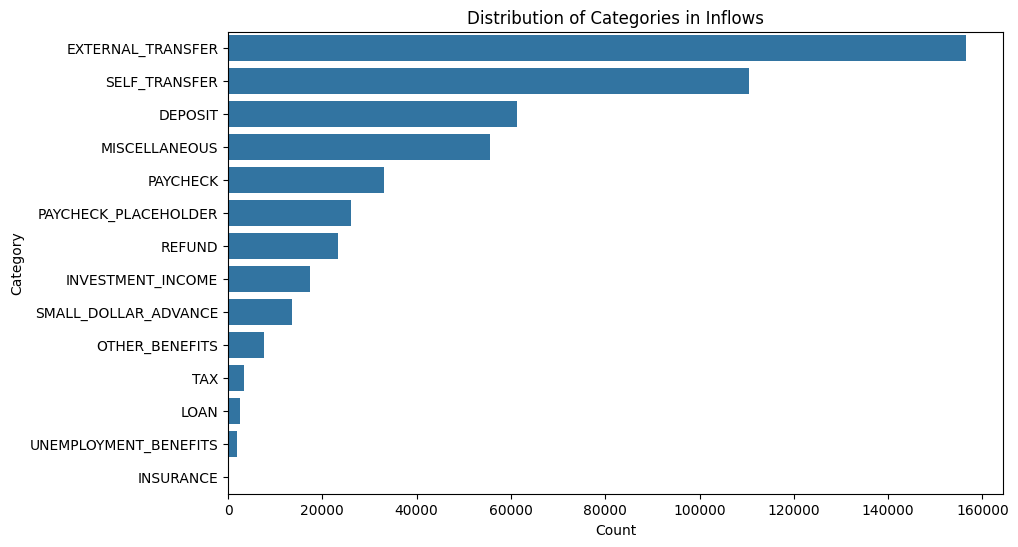

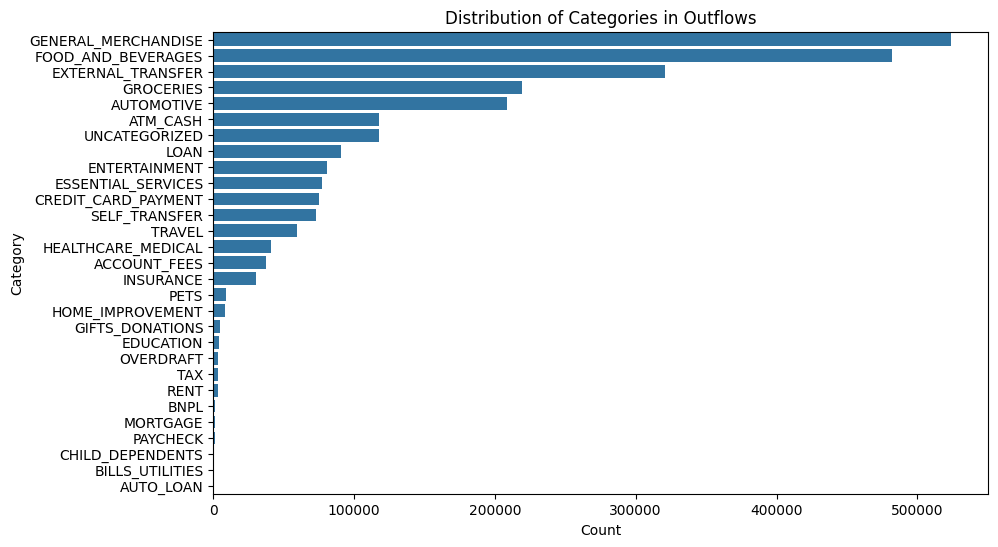

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=inflows, y='category', order=inflows['category'].value_counts().index)
plt.title('Distribution of Categories in Inflows')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=outflows, y='category', order=outflows['category'].value_counts().index)
plt.title('Distribution of Categories in Outflows')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

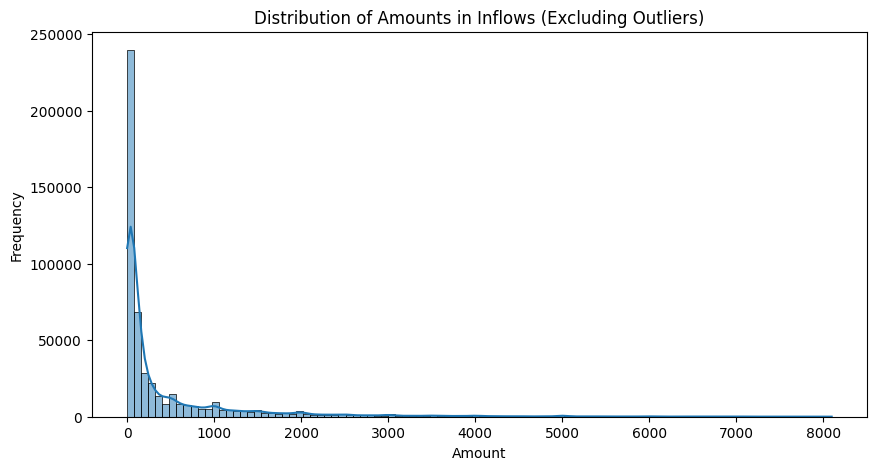

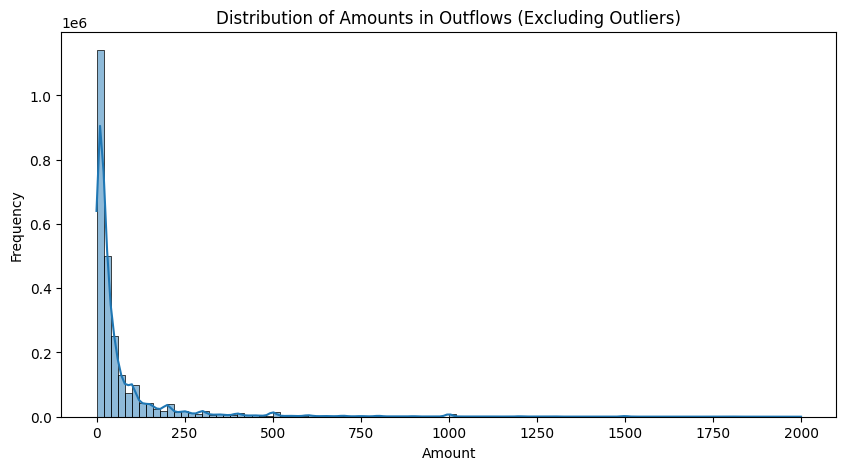

In [10]:
# get 99th percentile (exclude the top 1%)
threshold_inflows = inflows['amount'].quantile(0.99)
threshold_outflows = outflows['amount'].quantile(0.99)
filtered_inflows = inflows[inflows['amount'] < threshold_inflows]
filtered_outflows = outflows[outflows['amount'] < threshold_outflows]

# histogram for inflows
plt.figure(figsize=(10, 5))
sns.histplot(filtered_inflows['amount'], bins=100, kde=True)
plt.title('Distribution of Amounts in Inflows (Excluding Outliers)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# histogram for outflows
plt.figure(figsize=(10, 5))
sns.histplot(filtered_outflows['amount'], bins=100, kde=True)
plt.title('Distribution of Amounts in Outflows (Excluding Outliers)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

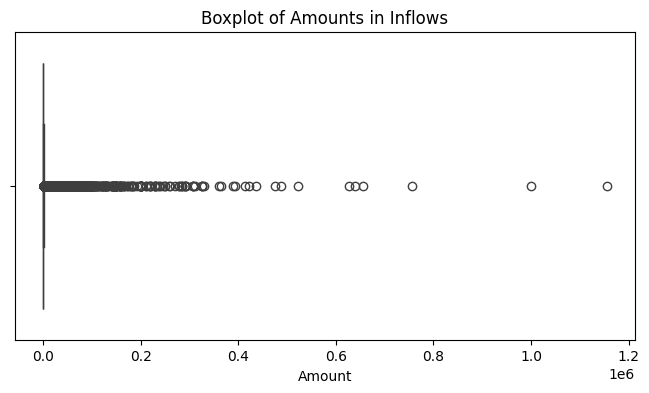

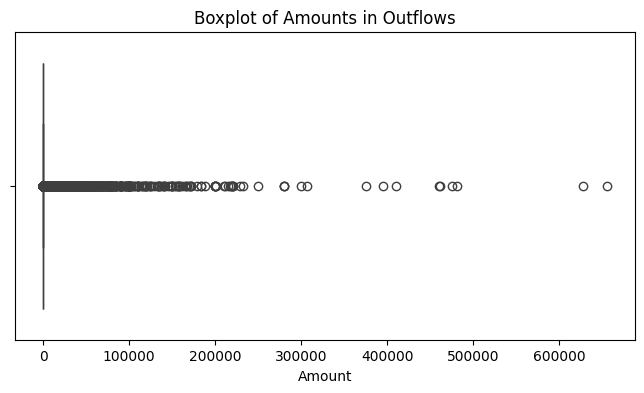

In [11]:
# Boxplot for inflows 'amount'
plt.figure(figsize=(8, 4))
sns.boxplot(x=inflows['amount'])
plt.title('Boxplot of Amounts in Inflows')
plt.xlabel('Amount')
plt.show()

# Boxplot for outflows 'amount'
plt.figure(figsize=(8, 4))
sns.boxplot(x=outflows['amount'])
plt.title('Boxplot of Amounts in Outflows')
plt.xlabel('Amount')
plt.show()

In [12]:
merchant_counts = outflows.groupby(['category', 'memo']).size().reset_index(name='count')
# merchant_counts
# get # counts for each category and memo

most_common_merchants = merchant_counts.sort_values(['category', 'count'], ascending=[True, False])
# most_common_merchants

top_merchants_per_category = most_common_merchants.groupby('category').head(1)
top_merchants_per_category.head(50)


,category,memo,count
0,ACCOUNT_FEES,ACCOUNT_FEES,37511
1,ATM_CASH,ATM_CASH,117651
2,AUTOMOTIVE,AUTOMOTIVE,208579
3,AUTO_LOAN,AUTO_LOAN,1
4,BILLS_UTILITIES,BILLS_UTILITIES,23
5,BNPL,BNPL,1543
6,CHILD_DEPENDENTS,CHILD_DEPENDENTS,936
7,CREDIT_CARD_PAYMENT,CREDIT_CARD_PAYMENT,75506
1865,EDUCATION,Teacherspayteachers.com,90
2130,ENTERTAINMENT,ENTERTAINMENT,80885


Above I have displayed the most common merchants/memo for each category.